<h1 style="color:rgb(0,120,170)">Assignment 2: Maximum Likelihood</h1>

This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(210,90,80)">Exercise 1 (25 points):</h3>

Compute the Maximum Likelihood Estimator for the parameter $\lambda > 0$ of a
Poisson distribution. This means: Assuming we have data samples ${x_{1},x_{2},...,x_{n}}$, we want to
find the $\lambda$ that maximizes the likelihood

$$
\mathcal{L}(\lambda) = \prod_{i=1}^{n} \mathcal{P}(x_{i}; \lambda) = \prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} \mathcal{e}^{-\lambda}
$$


**Hint:** You will have a much easier time if you compute with the log-likelihood as compared to the likelihood.

You should arrive at this solution: $\hat{\lambda} = \frac 1 n \sum_{i=1}^{n} x_{i}$.

########## YOUR SOLUTION HERE ##########

Bit of theory for myself: 
* A maximum likelihood estimator (MLE) is a statistical method used to estimate the parameters of a probability distribution by maximizing the likelihood function. 
* The likelihood function represents the probability of observing a set of data given the parameter values.
* $\underline{\textbf{The MLE method finds the values of the parameters that make the observed data most probable or likely, given the assumed distribution.}}$

The MLE is the solution of the following maximization problem

$$
\hat{\lambda} = \argmax_\lambda\mathcal{L}(\lambda; x_1, x_2, ... ,x_n)

$$
Before we start calculating maximum, we have to transform using logarithms:
$$
\mathcal{L}(\lambda)= \log\left(\prod_{i=1}^{n} \frac{\lambda^{x_{i}}}{x_{i}!} e^{-\lambda}\right) = \sum_{i=1}^{n}\left(\frac{\lambda^{x_{i}}}{x_{i}!} e^{-\lambda} \right) = \sum_{i=1}^{n}\left(\log(\lambda^{x_{i}}) - \log(x_{i}!) + \log(e^{-\lambda}) \right) =
$$

$$
=\sum_{i=1}^{n}\left(\log(\lambda^{x_{i}}) - \log(x_{i}!) + \log(e^{-\lambda}) \right) = \log(\lambda)\sum_{i=1}^{n}x_i - \sum_{i=1}^{n}\log(x_{i}!)  - n\lambda
$$
The first order condition for a maximum is: 

$$
\frac{\partial \mathcal{L} (\lambda; x_1, x_2, ... ,x_n) }{\partial\lambda} = \frac{\partial \Bigl(\log(\lambda)\sum_{i=1}^{n}x_i - \sum_{i=1}^{n}\log(x_{i}!)  - n\lambda \Bigr) }{\partial \lambda} = -n + \frac{1}{\lambda}\sum_{i=1}^{n}x_i = 0
$$

which can be simplified to:
$$
\lambda = \frac 1 n \sum_{i=1}^{n} x_{i}
$$

In the next exercises, we will plot the log-likelihood from the previous task as a function of $\lambda$ and mark the
position where the maximum occurs. Use the data stored in poisson.csv for this task. As
possible values for $\lambda$ we suggest values from $1$ to $50$ with a step size of $0.5$, i.e. $(1.0, 1.5, 2.0, ...).$ 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data_df = pd.read_csv('poisson.csv',header=None)

# print the head of the dataset, good practice
data_df.head()

,0
0,11
1,10
2,11
3,9
4,12


In [7]:
X = data_df.values[:,0]

print(type(data_df))
print(type(X))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


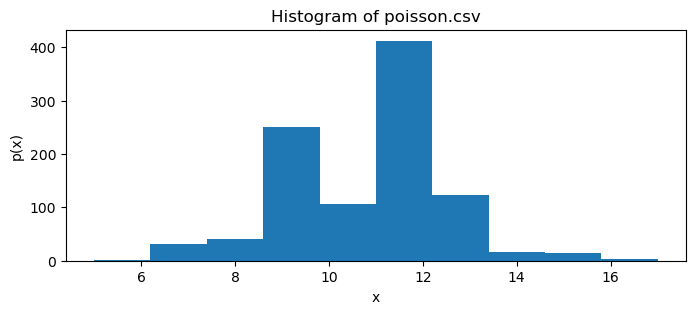

In [8]:
plt.figure(figsize=(8,3))
plt.hist(X)
plt.xlabel('x')
plt.ylabel('p(x)')
plt.title('Histogram of poisson.csv');
plt.show()

**Log Likelihood:**

In [9]:
import math

def loglikelihood(x, lam):
    if lam == 0:
        return -1
    lnL = 0 
    for xi in x:
        lnL += xi*np.log(lam)-np.log(math.factorial(xi))-lam
    return lnL

In [17]:
#test the function
lam_set = np.linspace(1,50,99)
print(X.shape)


print("lnL(1)  = %9.2f"%loglikelihood(X,lam_set[0]))
print("lnL(10) = %9.2f"%loglikelihood(X,lam_set[9*2]))
print("lnL(20) = %9.2f"%loglikelihood(X,lam_set[19*2]))
print("lnL(30) = %9.2f"%loglikelihood(X,lam_set[29*2]))
print("lnL(40) = %9.2f"%loglikelihood(X,lam_set[39*2]))
print("lnL(50) = %9.2f"%loglikelihood(X,lam_set[49*2]))

(1000,)
lnL(1)  = -17657.38
lnL(10) =  -2256.88
lnL(20) =  -4911.60
lnL(30) = -10614.89
lnL(40) = -17566.32
lnL(50) = -25201.67


<h3 style="color:rgb(210,90,80)">Exercise 2 (5 points):</h3>

Implement the `estimator_formula` function returning the analytic solution for lambda-hat

In [11]:
def estimator_formula(X):
    """ the estimator returns lambda-hat according to the result of the calculation in task 1"""
    
    ########## YOUR SOLUTION HERE ##########   
    # this method implies that we find lambda, which leads to the highest log-likelihood
    # finding of the lambda is based on the analytical solution we defined in the first exercise
    # Disadvantage is that it's not completely preciseful.
    lam_max_formula = sum(X)/len(X)
    return lam_max_formula

In [12]:
lam_max_formula = estimator_formula(X)
print('Likelihood is maximal at lambda-hat (formula) = %9.3f'%lam_max_formula)
print('            Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max_formula))

Likelihood is maximal at lambda-hat (formula) =    10.597
            Log-Likelihood at this lambda-hat = -2239.405


<h3 style="color:rgb(210,90,80)">Exercise 3 (5 points):</h3>

Implement the `estimator_data` function returning an estimate for lambda-hat numerically using argmax over the suggested support points of lambda

In [13]:
def estimator_support(X, lam_set):
    loglikelih = [loglikelihood(X,lami) for lami in lam_set]

    ########## YOUR SOLUTION HERE ##########
    
    return loglikelih, ln_min, ln_max, lam_max

In [14]:
loglikelih, ln_min, ln_max, lam_max = estimator_support(X, lam_set)
print('Likelihood is maximal at lambda-hat (argmax) = %9.3f'%lam_max)
print('Log-Likelihood at this lambda-hat = %9.3f'%loglikelihood(X,lam_max))

-2239.8515449798792
20
9


NameError: name 'lam_max' is not defined

<h3 style="color:rgb(210,90,80)">Exercise 4 (10 points):</h3>

* Plot the loglikelihood function over `lam_set`
* Mark the maxima in the plot according to `estimator_formula` and `estimator_support`

In [ ]:
########## YOUR SOLUTION HERE ##########

<h3 style="color:rgb(208,90,80)">Exercise 5 (5 points)</h3>

* Explain and discuss the result in your own words. Where is the maximum?

########## YOUR SOLUTION HERE ##########